In [1]:
from datetime import datetime
import pickle

file="../../data/amazon/movies.txt"
file_counter="../../data/amazon/counted.pkl"
file_image="../../data/amazon/counted.svg"

In [2]:
# https://stackoverflow.com/a/19201448
def save_counter(obj):
    with open(file_counter, 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_counter():
    with open(file_counter, 'rb') as f:
        return pickle.load(f)

In [3]:
if(False):
    i=0
    stop=-100
    counter = {}
    with open(file, 'r', errors='ignore') as f:
        for line in f:
            #print(line)
            identifier = line.split(':')[0]
            if 'review/score' in identifier:
                score = line.split(':')[1].strip()
                #print(score)
            elif 'review/time' in identifier:
                time=str(datetime.fromtimestamp(int(line.split(':')[1].strip())))[0:7]
                #print(time)
            elif 'review/summary' in identifier:
                if not time in counter:
                    counter[time] = {}
                if not score in counter[time]:
                    counter[time][score] = 1
                else:
                    counter[time][score] += 1


                #if not time in counter:
                #    counter[time] = 1
                #else:
                #    counter[time] += 1
            # dev
            i=i+1
            if(i==stop):
                break

    save_counter(counter)

In [4]:
counter=load_counter()
print(counter)

{'2007-06': {'3.0': 5134, '5.0': 30535, '4.0': 11535, '1.0': 3880, '2.0': 2849}, '2006-11': {'5.0': 28872, '1.0': 3163, '3.0': 5299, '4.0': 11814, '2.0': 2845}, '2007-12': {'3.0': 6896, '5.0': 40731, '4.0': 15178, '1.0': 5006, '2.0': 4098}, '2007-08': {'3.0': 6671, '4.0': 13992, '5.0': 33390, '2.0': 3425, '1.0': 3837}, '2008-12': {'2.0': 3700, '5.0': 36715, '4.0': 13831, '1.0': 5857, '3.0': 6687}, '2003-08': {'5.0': 15256, '4.0': 6684, '3.0': 3343, '2.0': 1835, '1.0': 2187}, '2002-12': {'5.0': 16194, '4.0': 7005, '2.0': 1915, '3.0': 3006, '1.0': 2000}, '2003-02': {'5.0': 15485, '4.0': 6480, '2.0': 1395, '3.0': 3296, '1.0': 1572}, '2003-09': {'5.0': 15628, '3.0': 2873, '1.0': 1956, '4.0': 7025, '2.0': 1982}, '2003-01': {'5.0': 19814, '4.0': 8489, '1.0': 2433, '3.0': 4210, '2.0': 1992}, '2003-04': {'4.0': 7719, '5.0': 15882, '2.0': 1845, '3.0': 3466, '1.0': 1700}, '2003-03': {'5.0': 17307, '4.0': 6829, '3.0': 3597, '1.0': 1859, '2.0': 2192}, '2007-04': {'5.0': 25717, '4.0': 10413, '3.0':

In [5]:
labels=[]
list_1=[]
list_2=[]
list_3=[]
list_4=[]
list_5=[]

def put(values, key, lst):
    if not key in values:
        lst.append(0)
    else:
        lst.append(values[key])

for key_time in sorted(counter):
    labels.append(key_time)
    if False:
        if not "1.0" in counter[key_time]:
            list_1.append(0)
        else:
            list_1.append(counter[key_time]["1.0"])
    put(counter[key_time], "1.0", list_1)
    put(counter[key_time], "2.0", list_2)
    put(counter[key_time], "3.0", list_3)
    put(counter[key_time], "4.0", list_4)
    put(counter[key_time], "5.0", list_5)
                
print(labels)
print(list_1)
print(list_2)
print(list_3)
print(list_4)
print(list_5)

['1997-08', '1997-10', '1997-11', '1997-12', '1998-01', '1998-02', '1998-03', '1998-04', '1998-05', '1998-06', '1998-07', '1998-08', '1998-09', '1998-10', '1998-11', '1998-12', '1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06', '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12', '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06', '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12', '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03'

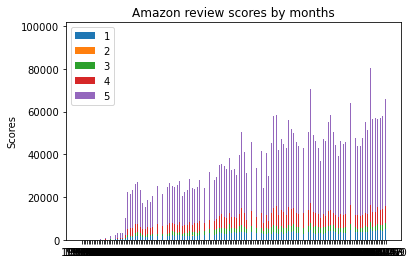

In [6]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, list_1, width, label='1')
ax.bar(labels, list_2, width, bottom=list_1, label='2')
ax.bar(labels, list_3, width, bottom=list_2, label='3')
ax.bar(labels, list_4, width, bottom=list_3, label='4')
ax.bar(labels, list_5, width, bottom=list_4, label='5')

ax.set_ylabel('Scores')
ax.set_title('Amazon review scores by months')
ax.legend()

plt.savefig(file_image)
plt.show()

In [7]:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html

if(False):
    import matplotlib.pyplot as plt

    labels = ['G1', 'G2', 'G3', 'G4', 'G5']
    men_means = [20, 35, 30, 35, 27]
    women_means = [25, 32, 34, 20, 25]
    men_std = [2, 3, 4, 1, 2]
    women_std = [3, 5, 2, 3, 3]
    width = 0.35       # the width of the bars: can also be len(x) sequence

    fig, ax = plt.subplots()

    ax.bar(labels, men_means, width, yerr=men_std, label='Men')
    ax.bar(labels, women_means, width, yerr=women_std, bottom=men_means,
           label='Women')

    ax.set_ylabel('Scores')
    ax.set_title('Scores by group and gender')
    ax.legend()

    plt.show()